In [50]:
import tensorflow as tf
from PIL import Image

import seaborn as sns
import numpy as np 
import pandas as pd
import os 
from tensorflow.keras.utils import to_categorical
from glob import glob 
import matplotlib.pyplot as plt
from matplotlib import image as mpimg


In [51]:
df=pd.read_csv('../data/archive/HAM10000_metadata.csv')

In [52]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [53]:
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

In [54]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [55]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [56]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

/var/folders/kb/dgvlq6h13qsgr5p3klzp3vz80000gn/T/ipykernel_94919/2028790963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(int(df['age'].mean()),inplace=True)


In [57]:
df.isnull().sum()


lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [58]:
lesion_type_dict={
    'nv':'Melanocytic nevi',
    'mel':'Melanoma',
    'bkl':'Benign Keratosis-like lesions',
    'bcc':'Basal cell carcinoma',
    'akiec':'Actiniv keratoses',
    'vasc':'Vasculr lesions',
    'df':'Dermatofibroma'


}


base_skin_dir = "data/archive"   # root of your dataset

imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, "*", "*", "*.jpg"))
}

In [59]:
df['path']=df['image_id'].map(imageid_path_dict.get)
df['cell_type']=df['dx'].map(lesion_type_dict.get)
df['cell_type_idx']=pd.Categorical(df['cell_type']).codes
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,Benign Keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,Benign Keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,Benign Keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,Benign Keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,Benign Keratosis-like lesions,2


# image preprocessing 


<h5 style="color:skyblue;">resizing of images because the original dimensions of 450 6003 take long time to process in netural network</h5>

FileNotFoundError: [Errno 2] No such file or directory: 'data/archive/HAM10000_images_part_2/ISIC_0029567.jpg'

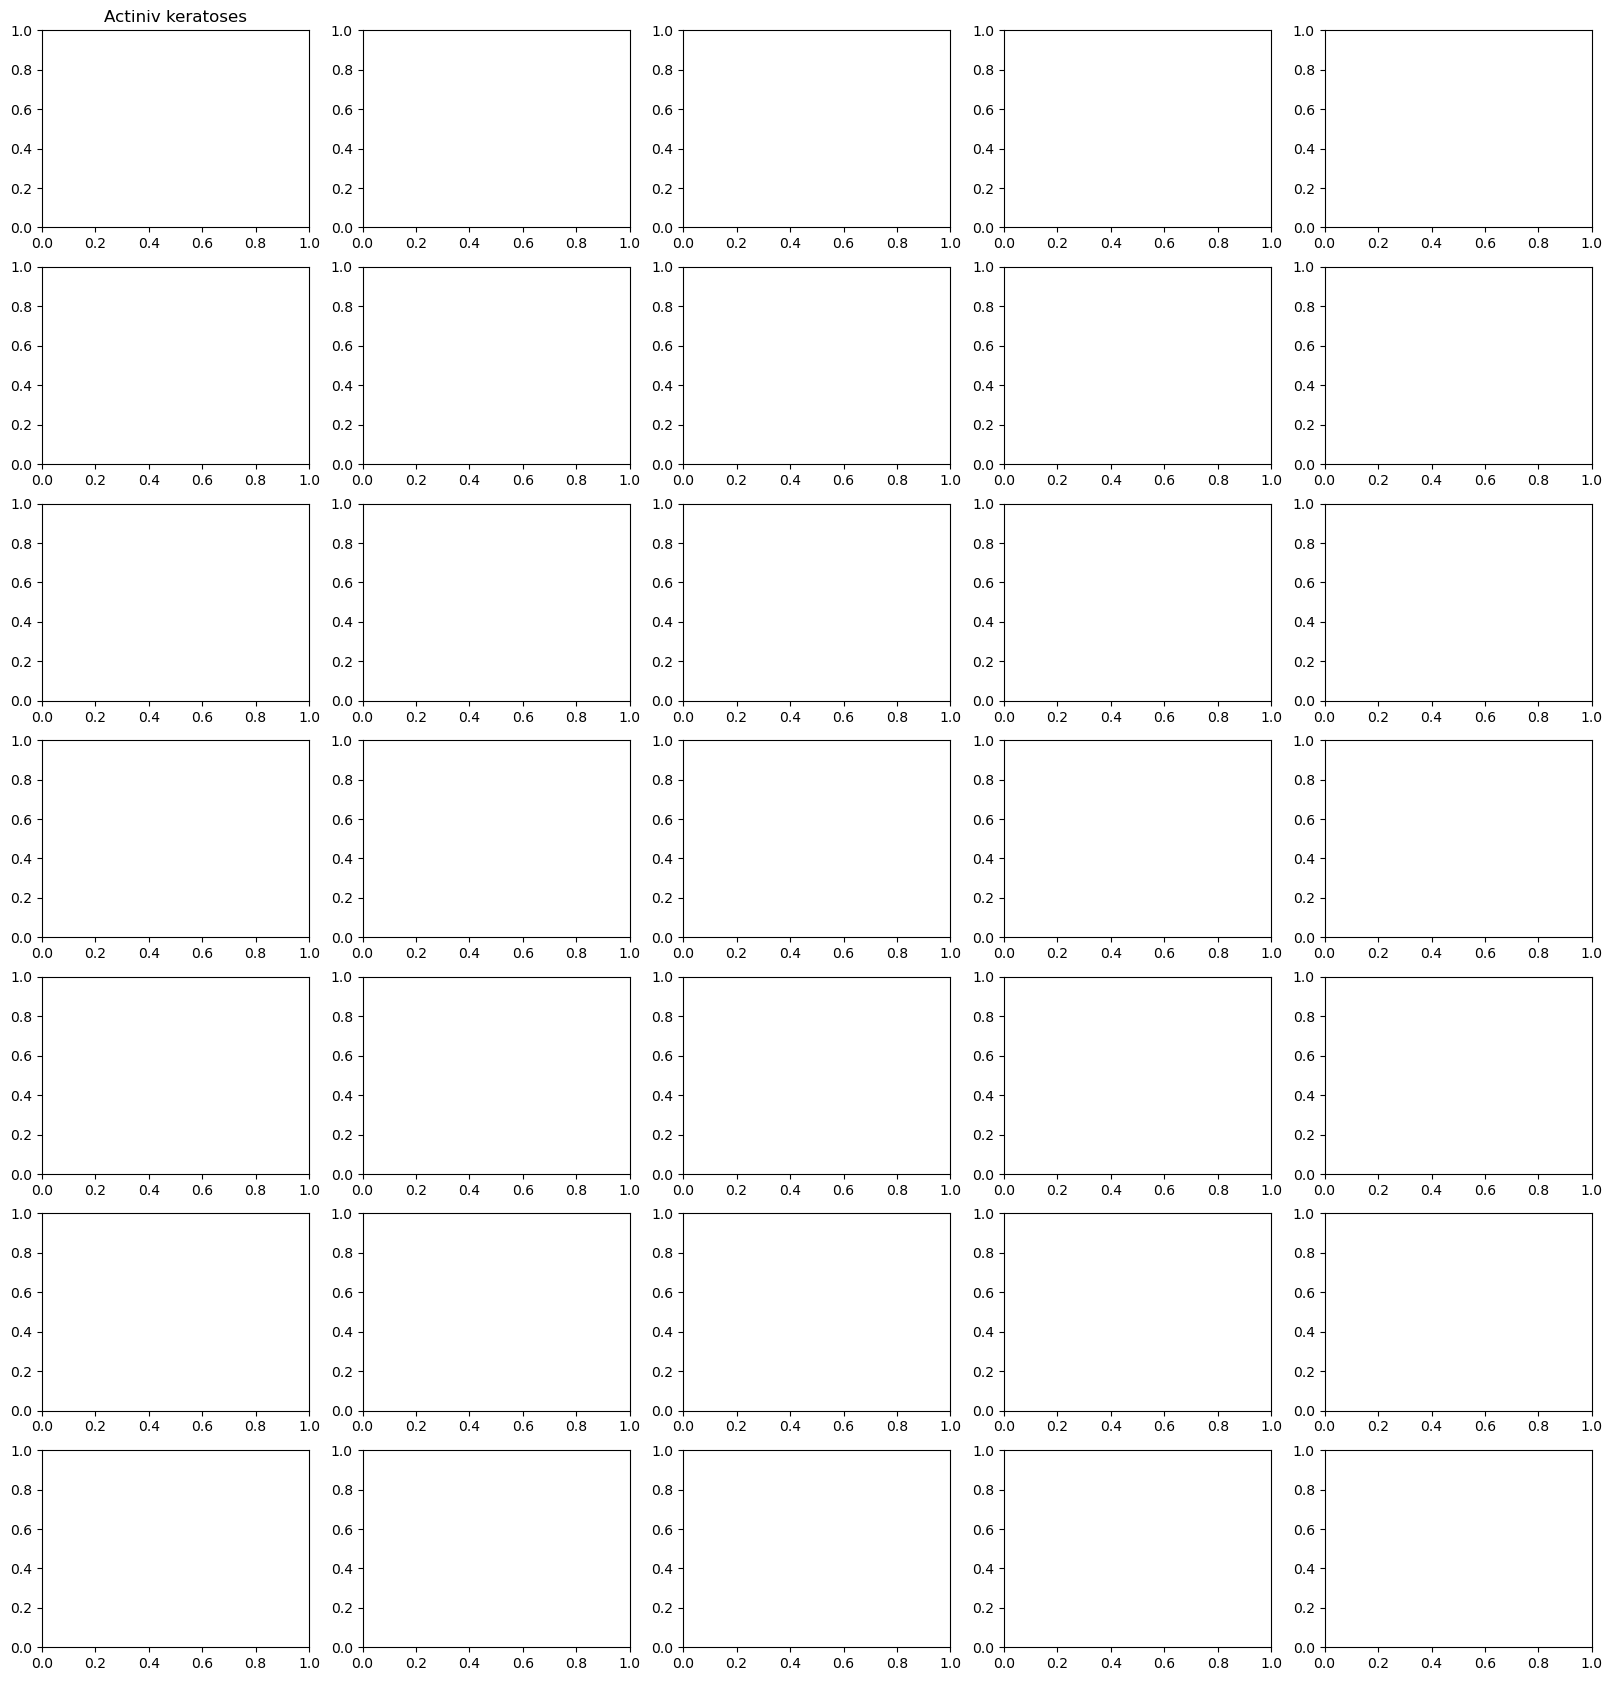

In [61]:
n_samples = 5
groups = list(df.sort_values(['cell_type']).groupby('cell_type'))
n_types = len(groups)

fig, m_axs = plt.subplots(n_types, n_samples, figsize=(4*n_samples, 3*n_types))

for row_axs, (type_name, type_rows) in zip(m_axs, groups):
    row_axs[0].set_title(type_name)

    sample_size = min(n_samples, len(type_rows))
    for c_ax, (_, c_row) in zip(row_axs, type_rows.sample(sample_size, random_state=2018).iterrows()):
        # construct file path using image_id
        img_path = os.path.join("data/archive/HAM10000_images_part_2", c_row['image_id'] + ".jpg")
        img = mpimg.imread(img_path)

        c_ax.imshow(img)
        c_ax.axis('off')

fig.tight_layout()
fig.savefig('category_samples.png', dpi=300)


In [62]:
df['image_id'].map(lambda x:x.shape).value_counts()

AttributeError: 'str' object has no attribute 'shape'

<Axes: title={'center': 'CELL TYPE'}, xlabel='cell_type', ylabel='Count'>

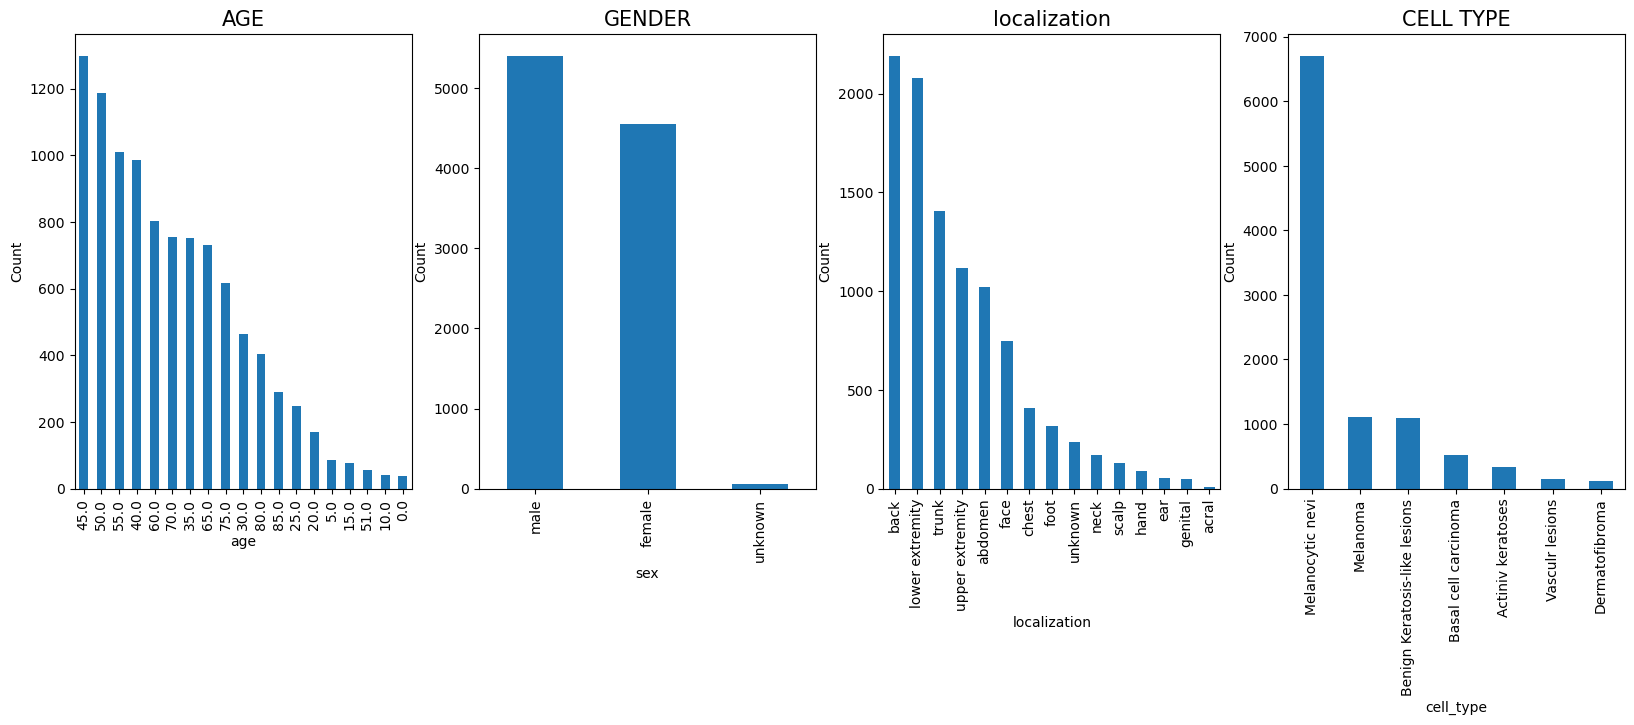

In [63]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()

1. Skin diseases are found to be maximum in people aged around 45. Minimum for 10 and below. We also observe that the probability of having skin disease increases with the increase in age.
2. Skin diseases are more prominent in Men as compared to Women and other gender.
3. Skin diseases are more visible on the "back" of the body and least on the "acral surfaces"(such as limbs, fingers, or ears).
4. The most found disease among people is Melanocytic nevi while the least found is Dermatofibroma

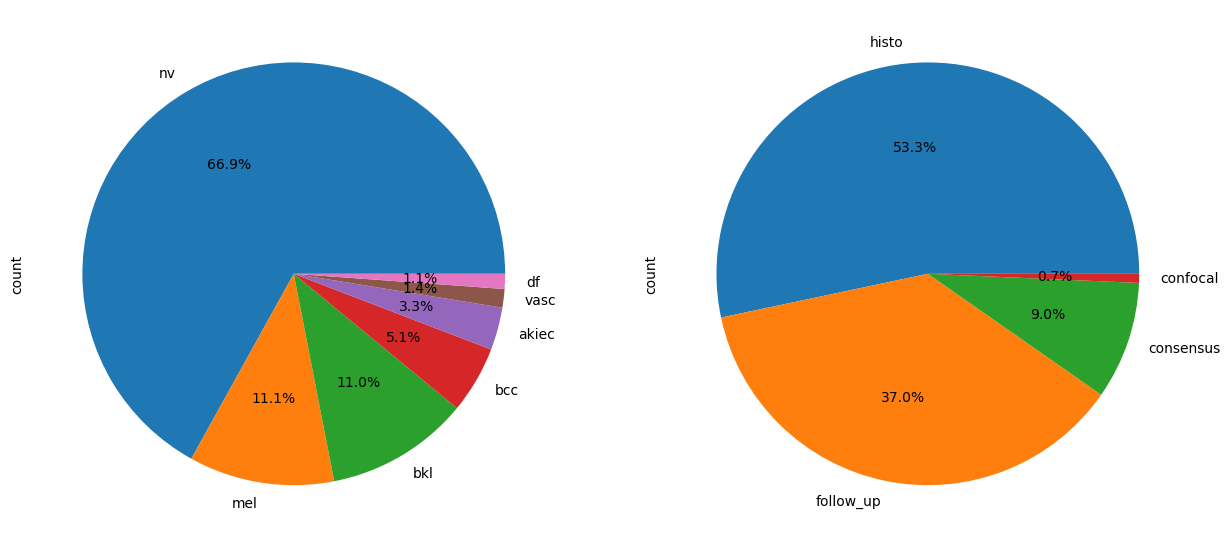

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()